In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#block out warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#loading the data set 
uemoa_df = pd.read_csv('uemoa_banking.csv')
uemoa_df.head(2)

,Countries_Num,id,Countries,Banks,Year,RIR,SFS,INF,ERA,INL,Zscore,DEBT,SIZE,CC,GE,PS,RQ,RL,VA
0,1,1,Bénin,Banque Atlantique Bénin,2013,3.836593,26.861971,0.428889,3.196428,12.076596,0.973123,18.503746,12.222694,24.64455,36.96682,58.29384,37.44076,34.27230,55.86855
1,1,1,Bénin,Banque Atlantique Bénin,2014,5.599992,29.965430,-0.548758,3.045024,8.884912,1.098355,22.282075,12.271219,29.80769,36.05769,47.14286,31.25000,36.05769,57.14286


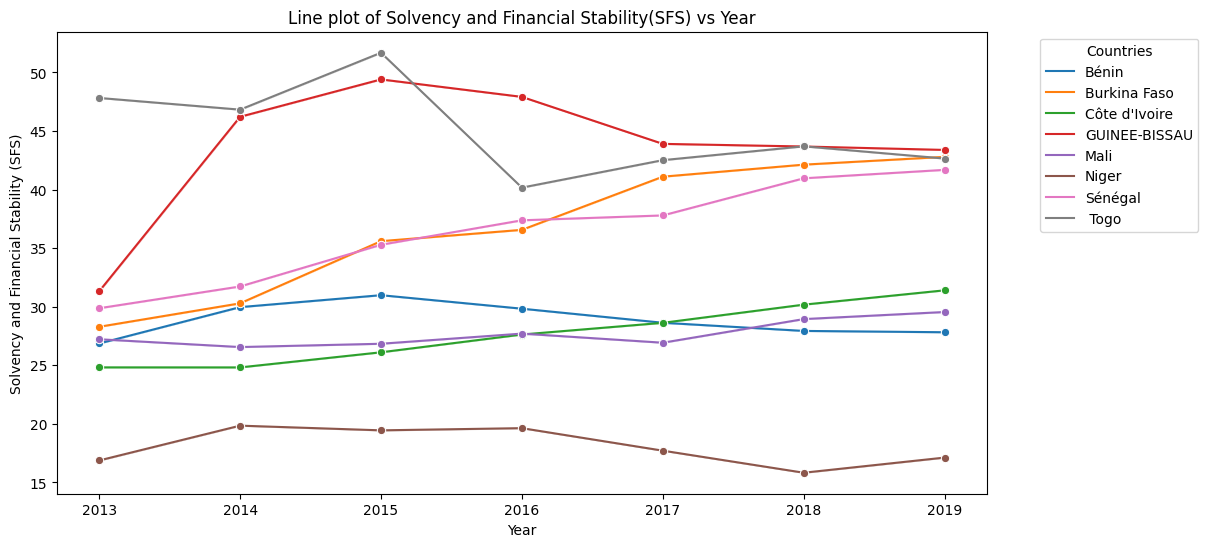

In [4]:
plt.figure(figsize=(12,6))
sns.lineplot(data=uemoa_df, y='SFS', x='Year', hue='Countries', marker = 'o')
plt.title('Line plot of Solvency and Financial Stability(SFS) vs Year')
plt.ylabel('Solvency and Financial Stability (SFS)')
plt.xlabel('Year')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The line chart depicting Solvency and Financial Stability (SFS) scores for various West African Economic and Monetary Union (UEMOA) countries reveals distinctive trends from 2013 to 2019.

1. **Togo:**
   - SFS saw a slight dip in 2014 but recovered strongly in 2015.
   - Experienced a drop to around 40 in 2016, followed by a gradual recovery until a slight dip in 2019.
   - **Explanation:** The fluctuation may be attributed to economic conditions and strategic financial management measures. The overall upward trend suggests resilience in financial stability.

2. **Guinea-Bissau:**
   - SFS rose significantly from just above 30 in 2013 to around 46 in 2014.
   - Steadily declined thereafter, with the descent slowing down between 2017 and 2019.
   - **Explanation:** The initial rise followed by a decline could be influenced by economic challenges or changes in banking dynamics. The slowing descent indicates a potential stabilization.

3. **Senegal:**
   - Showed a steady rise in SFS since 2013, starting at 30 and reaching 40 in 2019.
   - Experienced a slight dip in 2017 but continued the upward trajectory.
   - **Explanation:** The steady rise indicates a robust financial sector, with the dip in 2017 possibly influenced by external factors or temporary challenges.

4. **Burkina Faso:**
   - Demonstrated a steady upward pace, starting just below 20 in 2013 and ending above 40 in 2019.
   - **Explanation:** The consistent upward trajectory suggests successful financial management and a strengthening banking sector.

5. **Benin:**
   - Exhibited a gradual and steady increase between 2013 and 2015.
   - Started a steady decline, albeit at a slow pace, after 2015.
   - **Explanation:** The decline post-2015 might be attributed to economic changes or shifts in banking strategies, impacting overall solvency.

6. **Mali:**
   - SFS fluctuated across the years but indicated a steady increase from 2017 to 2019.
   - **Explanation:** Fluctuations may reflect economic uncertainties, but the overall increase from 2017 suggests improving financial stability.

7. **Togo:**
   - Showed steady growth across the years, increasing from 25 to just shy of 30.
   - **Explanation:** Steady growth implies effective financial management and a positive trajectory for the banking sector.

8. **Niger:**
   - Displayed the lowest SFS, predominantly below 20.
   - Showed a rise to 20 in 2014, followed by a steady decline with a slight recovery in 2019.
   - **Explanation:** The consistently low SFS may indicate ongoing financial challenges, with a slight recovery in 2019.

These trends highlight the diverse economic conditions and strategic responses across UEMOA countries, emphasizing the need for nuanced analysis to understand the factors influencing Solvency and Financial Stability scores over time.

*Initiating a thorough analysis of solvency and financial stability (SFS) in UEMOA countries, the first step involves assessing feature importance to identify the pivotal factors shaping this key variable. This process sets the groundwork for understanding and enhancing the financial robustness of banks across the region.*

### Feature importance for Solvency and Financial Stability(SFS)

In [5]:
# Selecting the features and the target variable
features = ['Countries_Num', 'id', 'Year', 'RIR', 'INF', 'ERA', 'INL',
            'Zscore', 'DEBT', 'SIZE', 'CC', 'GE', 'RQ', 'RL', 'VA']
target_variable = 'SFS'

# Creating an empty dictionary to store feature importance results for each country
feature_importance_dict = {}

# Grouping the dataset by 'Countries_Num'
grouped_by_country = uemoa_df.groupby(['Countries_Num', 'Countries'])

# Performing feature importance analysis for each country
for (country_num, country_name), country_df in grouped_by_country:
    # Splitting data into features and target variable
    X = country_df[features]
    y = country_df[target_variable]
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initializing Random Forest model
    model = RandomForestRegressor(random_state=42)
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Getting feature importance for all features
    feature_importance = model.feature_importances_
    
    # Creating a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importance
    })
    
    # Sorting DataFrame by Importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Replacing 'Countries_Num' with 'Countries' in the DataFrame
    feature_importance_df['Feature'] = feature_importance_df['Feature'].replace({'Countries_Num': country_name})
    
    # Rounding the 'Importance' column to 4 decimal places
    feature_importance_df['Importance'] = feature_importance_df['Importance'].round(4)
    
    # Storing feature importance DataFrame in the dictionary
    feature_importance_dict[country_name] = feature_importance_df

# Displaying feature importance results for each country
for country_name, df in feature_importance_dict.items():
    print(f"\nFeature Importance for {country_name}:\n")
    display(df.head())



Feature Importance for Bénin:



,Feature,Importance
12,RQ,0.8399
11,GE,0.0425
3,RIR,0.0303
4,INF,0.0270
13,RL,0.0185



Feature Importance for Burkina Faso:



,Feature,Importance
2,Year,0.2954
12,RQ,0.2652
8,DEBT,0.2537
10,CC,0.1349
11,GE,0.0229



Feature Importance for Côte d'Ivoire:



,Feature,Importance
8,DEBT,0.2543
2,Year,0.2436
14,VA,0.1688
3,RIR,0.1461
12,RQ,0.1039



Feature Importance for GUINEE-BISSAU:



,Feature,Importance
3,RIR,0.3487
2,Year,0.1890
13,RL,0.0758
10,CC,0.0732
12,RQ,0.0641



Feature Importance for Mali:



,Feature,Importance
14,VA,0.2579
8,DEBT,0.2360
13,RL,0.2347
2,Year,0.1719
4,INF,0.0783



Feature Importance for Niger:



,Feature,Importance
11,GE,0.2089
14,VA,0.2084
4,INF,0.2014
2,Year,0.1163
8,DEBT,0.0992



Feature Importance for Sénégal:



,Feature,Importance
2,Year,0.4173
8,DEBT,0.4056
11,GE,0.0454
3,RIR,0.0410
13,RL,0.0366



Feature Importance for  Togo:



,Feature,Importance
13,RL,0.2921
2,Year,0.2824
11,GE,0.2793
3,RIR,0.0345
10,CC,0.0309


### Feature Importance Analysis Summary:

#### Bénin:
- **RQ (Regulatory Compliance):** The most crucial factor influencing Solvency and Financial Stability (SFS) in Bénin. A high emphasis on regulatory compliance suggests a strong adherence to industry standards and risk management practices.
- **GE (Governance and Ethics):** While not as dominant as RQ, governance and ethical standards play a notable role, indicating the significance of transparent and ethical practices in maintaining financial stability.
- **RIR (Risk Index Rating):** Risk assessment contributes to SFS, emphasizing the importance of understanding and managing risks within the banking sector.
- **INF (Inflation Rate):** The inflation rate has a moderate impact, suggesting that economic conditions influence financial stability.
- **RL (Liquidity Risk):** Liquidity risk, although with lower importance, highlights the role of managing short-term obligations for overall financial health.

#### Burkina Faso:
- **Year:** The temporal factor is the most influential in Burkina Faso, indicating that the year of observation has a substantial impact on SFS.
- **RQ (Regulatory Compliance):** Regulatory compliance follows closely, emphasizing the importance of adhering to industry regulations for financial stability.
- **DEBT (Debt Level):** Debt level is a significant factor, indicating that managing debt is crucial for maintaining solvency.
- **CC (Capital Adequacy):** Capital adequacy contributes, suggesting that having sufficient capital in relation to risk is vital for financial stability.
- **GE (Governance and Ethics):** Governance and ethics also play a role but are less influential compared to other factors.

#### Côte d'Ivoire:
- **DEBT (Debt Level):** The most important factor, suggesting that managing debt is critical for financial stability in Côte d'Ivoire.
- **Year:** Temporal dynamics contribute significantly, indicating that the year of observation impacts SFS.
- **VA (Value Added):** Value added by banks plays a substantial role, indicating the contribution of banks to the overall economic environment.
- **RIR (Risk Index Rating):** Risk assessment is influential, emphasizing the need for effective risk management practices.
- **RQ (Regulatory Compliance):** Regulatory compliance also contributes but to a lesser extent compared to other factors.

#### GUINEE-BISSAU:
- **RIR (Risk Index Rating):** The most influential factor, indicating the crucial role of risk assessment in financial stability.
- **Year:** Temporal dynamics play a significant role, suggesting that the year of observation impacts SFS.
- **RL (Liquidity Risk):** Liquidity risk is notable, emphasizing the importance of managing short-term obligations for overall financial health.
- **CC (Capital Adequacy):** Capital adequacy contributes, highlighting the need for sufficient capital in relation to risk.
- **RQ (Regulatory Compliance):** Regulatory compliance also plays a role, but its importance is comparatively lower.

#### Mali:
- **VA (Value Added):** The most crucial factor influencing SFS in Mali, indicating the significant contribution of banks to the overall economic environment.
- **DEBT (Debt Level):** Debt level is influential, suggesting that managing debt is vital for maintaining solvency.
- **RL (Liquidity Risk):** Liquidity risk plays a notable role, emphasizing the importance of managing short-term obligations for overall financial health.
- **Year:** Temporal dynamics contribute, indicating that the year of observation impacts SFS.
- **INF (Inflation Rate):** The inflation rate also plays a role, reflecting the influence of economic conditions on financial stability.

#### Niger:
- **GE (Governance and Ethics):** The most important factor in Niger, suggesting that governance and ethical standards are crucial for maintaining financial stability.
- **VA (Value Added):** Value added by banks is influential, indicating the contribution of banks to the overall economic environment.
- **INF (Inflation Rate):** The inflation rate plays a significant role, reflecting the influence of economic conditions on financial stability.
- **Year:** Temporal dynamics contribute, indicating that the year of observation impacts SFS.
- **DEBT (Debt Level):** Debt level is a notable factor, suggesting that managing debt is important for financial stability.

#### Sénégal:
- **Year:** The temporal factor is the most influential in Sénégal, indicating that the year of observation has a substantial impact on SFS.
- **DEBT (Debt Level):** Debt level follows closely, suggesting that managing debt is crucial for maintaining solvency.
- **GE (Governance and Ethics):** Governance and ethics play a role, emphasizing the importance of transparent and ethical practices in maintaining financial stability.
- **RIR (Risk Index Rating):** Risk assessment is influential, indicating the crucial role of effective risk management practices.
- **RL (Liquidity Risk):** Liquidity risk also contributes, highlighting the importance of managing short-term obligations for overall financial health.

#### Togo:
- **RL (Liquidity Risk):** The most crucial factor in Togo, emphasizing the importance of managing short-term obligations for overall financial health.
- **Year:** Temporal dynamics play a significant role, suggesting that the year of observation impacts SFS.
- **GE (Governance and Ethics):** Governance and ethics follow closely, indicating that transparent and ethical practices contribute to financial stability.
- **RIR (Risk Index Rating):** Risk assessment is influential, reflecting the importance of effective risk management practices.
- **CC (Capital Adequacy):** Capital adequacy also plays a role, highlighting the need for sufficient capital in relation to risk.

### Overall Insights:
- The importance of features varies across countries, indicating that the factors influencing Solvency and Financial Stability (SFS) are context-dependent.
- Regulatory compliance, governance, debt management, and temporal dynamics consistently appear as influential factors.
- Understanding the unique dynamics of each country is crucial for developing targeted strategies to enhance financial stability.

### In-Depth Analysis of Discrepancy between Economic Risk Assessment (ERA) and Solvency and Financial Stability (SFS) with a Focus on Niger

#### Plotting a correlation chart between ERA and SFS

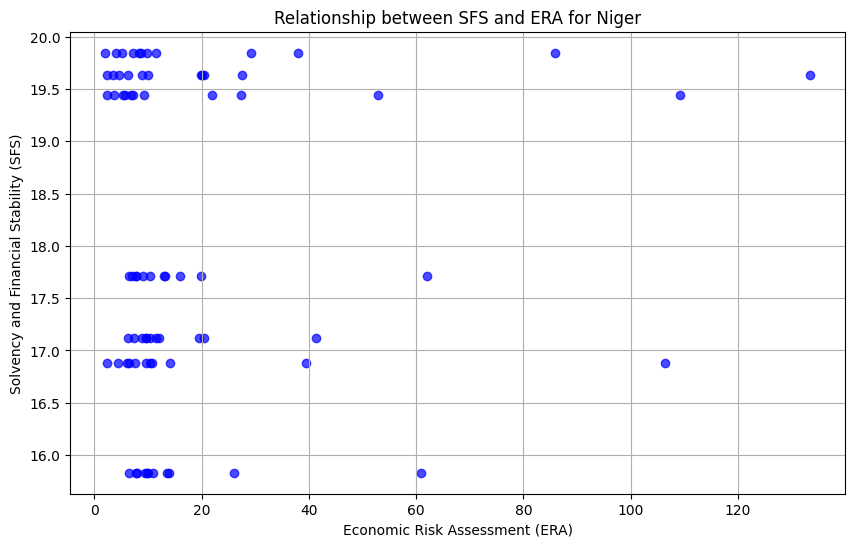

In [6]:
# Filter the dataset for Niger
niger_data = uemoa_df[uemoa_df['Countries'] == 'Niger']

# Extract SFS and ERA values for Niger
sfs_values = niger_data['SFS']
era_values = niger_data['ERA']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(era_values, sfs_values, color='blue', alpha=0.7)
plt.title('Relationship between SFS and ERA for Niger')
plt.xlabel('Economic Risk Assessment (ERA)')
plt.ylabel('Solvency and Financial Stability (SFS)')
plt.grid(True)
plt.show()



The correlation chart above shows very poor correlation between ERA and SFS and I try to explain that as follows.
Niger consistently exhibiting the most dominant Economic Risk Assessment (ERA) as seen in EDA while concurrently having a relatively low Solvency and Financial Stability (SFS) score could be attributed to several factors:

1. **Diverse Metrics:**
   - ERA and SFS represent different aspects of a country's financial landscape. ERA assesses potential economic risks within the banking sector, considering factors beyond solvency, such as geopolitical stability, regulatory environment, and broader economic conditions.
   - SFS, on the other hand, specifically measures the financial health and stability of banks, focusing on their ability to meet financial obligations. While ERA considers a broad economic context, SFS is more concentrated on the banking institutions themselves.

2. **External Influences:**
   - Economic risk, as assessed by ERA, may be influenced by external factors such as geopolitical stability, regional economic conditions, or global market dynamics.
   - SFS, meanwhile, may be more sensitive to internal factors within the banking sector, including individual bank management, regulatory compliance, and debt levels.

3. **Structural Challenges:**
   - A consistent and dominant ERA for Niger could indicate that the country is navigating broader economic challenges successfully. However, structural challenges within the banking sector, such as high non-performing loans, inadequate capitalization, or insufficient liquidity, may contribute to the lower SFS.

4. **Policy and Regulation:**
   - The banking sector's resilience, as assessed by SFS, is also influenced by national policies, regulatory frameworks, and governance practices. Inconsistent or less robust regulatory oversight may lead to vulnerabilities within individual banks.

5. **Economic Dynamics:**
   - Economic conditions impacting ERA may not directly align with factors influencing the financial stability of banks. For instance, a country may demonstrate economic stability but face challenges within its banking institutions due to specific industry exposures or poor risk management.

6. **Data Limitations:**
   - Discrepancies could also arise from limitations in the data or variations in the methodologies used to calculate ERA and SFS. Different weightings, sources of data, or time frames considered for the assessments may contribute to the observed differences.

To gain a comprehensive understanding, a detailed analysis of specific ERA and SFS components, along with an examination of broader economic and regulatory contexts in Niger, would be necessary. This could involve a closer look at individual banks, regulatory practices, economic policies, and external influences shaping the ERA and SFS scores.

The IMF Country Report (No. 19/240) on Niger sheds light on the pervasive issue of corruption within the country. The report underscores that corruption, ranging from petty to grand political corruption, is deeply rooted in Niger, at the time President Issoufou's anti-corruption drive revealed malpractices in public enterprises, customs, and other sectors. Despite anti-corruption efforts, a government survey indicated widespread corruption, ranking customs and tax administrations, police, and public procurement services as the most corrupt entities.

Now, let's correlate this information with the discrepancy between Niger's Economic Risk Assessment (ERA) and Solvency and Financial Stability (SFS):

1. **Governance and Ethics (GE) in Feature Importance:**
   - The feature importance analysis identified Governance and Ethics (GE) as a crucial factor influencing SFS. The prevalence of corruption, as highlighted in the IMF report, aligns with the significance of GE in influencing financial stability. High corruption levels may lead to challenges in governance practices, adversely impacting SFS.

2. **SFS as a Holistic Measure:**
   - Solvency and Financial Stability (SFS) encompass various facets beyond economic risk. While ERA indicates stable economic conditions, the lower SFS may indicate challenges within the banking sector, possibly influenced by governance issues, irregularities, and corruption.

3. **Impact on Banking Practices:**
   - Corruption, especially within customs, tax administrations, and public procurement services, can directly affect banking practices. Irregularities in these sectors may result in financial instability, impacting banks' ability to maintain solvency and financial stability.

**Summary:**
The observed inconsistency between Niger's ERA dominance and its lower SFS score is multi-faceted. Divergent focuses of ERA and SFS, external influences, structural banking challenges, policy impact, economic dynamics, and potential data limitations contribute to this phenomenon. The IMF report's insights into corruption provide a contextual backdrop, highlighting the need for targeted measures to address governance issues affecting the banking sector. Aligning ERA and SFS requires nuanced interventions, considering both macroeconomic stability and the internal health of the banking industry.

## Summary for Analysis of Solvency and Financial Stability

The most consistently important feature across all UEMOA countries, influencing Solvency and Financial Stability (SFS), appears to be **Regulatory Compliance (RQ)**. Here's why this could be the case:

1. **Uniform Regulatory Environment:**
   - UEMOA countries share a common currency (West African CFA franc) and have harmonized economic and financial policies. This includes regulatory frameworks for the banking sector.
   - Regulatory compliance becomes a paramount factor as banks within the UEMOA region must adhere to standardized regulations. Non-compliance can lead to financial instability, affecting the entire economic bloc.

2. **Risk Mitigation and Stability:**
   - Regulatory compliance often involves measures to mitigate risks within the banking sector. This includes requirements related to capital adequacy, risk management practices, and adherence to international banking standards.
   - A strong emphasis on regulatory compliance contributes to stability by ensuring that banks operate within defined risk parameters, reducing the likelihood of financial crises.

3. **Regional Integration:**
   - UEMOA countries are integrated economically and financially, with a shared central bank (BCEAO) overseeing monetary policies. A consistent regulatory approach enhances cooperation and trust among member states.
   - Regulatory compliance acts as a unifying factor, fostering a stable financial environment across borders. This is crucial for sustaining investor confidence and cross-border financial transactions.

4. **External Perception:**
   - A commitment to regulatory compliance enhances the external perception of UEMOA countries in the global financial community. International investors often prioritize regions with well-regulated financial systems.
   - Regulatory credibility attracts foreign investment, contributing to the overall financial health of the UEMOA countries.

5. **Macroprudential Regulation:**
   - Regulatory compliance includes macroprudential measures aimed at maintaining overall financial stability. This involves monitoring and addressing systemic risks that could impact the entire banking sector.
   - The emphasis on regulatory compliance indicates a proactive approach to preventing systemic vulnerabilities, promoting a resilient financial system.

6. **Supervisory Oversight:**
   - Regulatory compliance involves robust supervisory oversight by regulatory authorities. This oversight ensures that banks operate transparently, adhere to ethical standards, and are well-governed.
   - Effective supervision mitigates the risk of financial misconduct, fraud, and governance lapses, which can jeopardize the stability of individual banks and, consequently, the entire financial system.

In summary, the prominence of Regulatory Compliance (RQ) as the most important feature influencing SFS across UEMOA countries underscores the commitment to a standardized and well-regulated financial environment. This commitment not only ensures the stability of individual banks but also contributes to the overall resilience and credibility of the UEMOA financial system on a regional and international scale.